<a href="https://colab.research.google.com/github/Rerzd/Ciencia_Datos_intro/blob/main/TallerDatosNaN_07Abril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_excel("titanic3.xls")
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# **Datos NAN, Donde y Cuantos son**

In [ ]:
df.isnull().sum()


,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


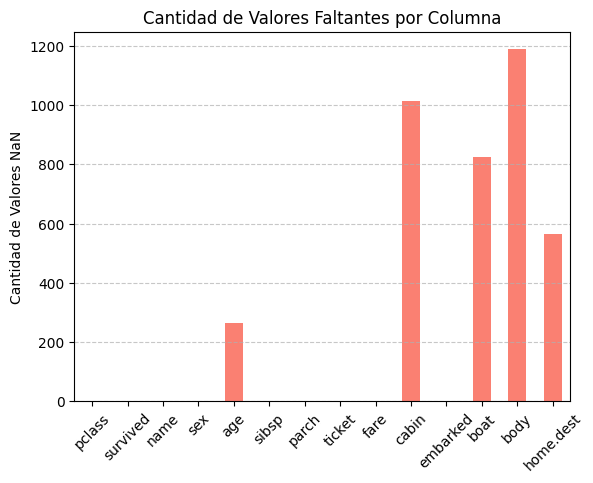

In [ ]:
nan = df.isnull().sum()

plt.figure()
nan.plot(kind='bar', color='salmon')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.ylabel('Cantidad de Valores NaN')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.7)

# **Eliminar Datos Nan**

In [ ]:
df_datoslimpios = df.copy()

columnas_importantes = ['pclass', 'survived', 'sex', 'age', 'fare', 'embarked']

df_datoslimpios = df_datoslimpios.dropna(subset=columnas_importantes)

columnas_a_eliminar = ['cabin', 'boat', 'body', 'home.dest']
df_datoslimpios = df_datoslimpios.drop(columns=columnas_a_eliminar)

In [ ]:
display(df_datoslimpios.isnull().sum())

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
embarked,0


In [ ]:
df_datoslimpios

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,46,0,0,2628,7.2250,C
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,C


In [ ]:
df_datoslimpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   int64  
 1   survived  1043 non-null   int64  
 2   name      1043 non-null   object 
 3   sex       1043 non-null   int8   
 4   age       1043 non-null   float64
 5   sibsp     1043 non-null   int64  
 6   parch     1043 non-null   int64  
 7   ticket    1043 non-null   float32
 8   fare      1043 non-null   float64
 9   embarked  1043 non-null   int8   
dtypes: float32(1), float64(2), int64(4), int8(2), object(1)
memory usage: 71.3+ KB


# **Analisis Estadistico**

In [ ]:
df_datoslimpios['sex'] = df_datoslimpios['sex'].map({'female': 0, 'male': 1}).astype('int8')

df_datoslimpios['embarked'] = df_datoslimpios['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int8')

df_datoslimpios['age'] = df_datoslimpios['age'].round().astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df_datoslimpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   int64  
 1   survived  1043 non-null   int64  
 2   name      1043 non-null   object 
 3   sex       1043 non-null   int8   
 4   age       1043 non-null   int64  
 5   sibsp     1043 non-null   int64  
 6   parch     1043 non-null   int64  
 7   ticket    1043 non-null   object 
 8   fare      1043 non-null   float64
 9   embarked  1043 non-null   int8   
dtypes: float64(1), int64(5), int8(2), object(2)
memory usage: 75.4+ KB


In [ ]:
display(df_datoslimpios.describe())

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,0.407478,0.629914,29.803452,0.504314,0.421860,36.603024,0.299137
std,0.840685,0.491601,0.483059,14.365289,0.913080,0.840655,55.753648,0.553014
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,2.000000,0.000000,1.000000,28.000000,0.000000,0.000000,15.750000,0.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.000000,35.077100,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


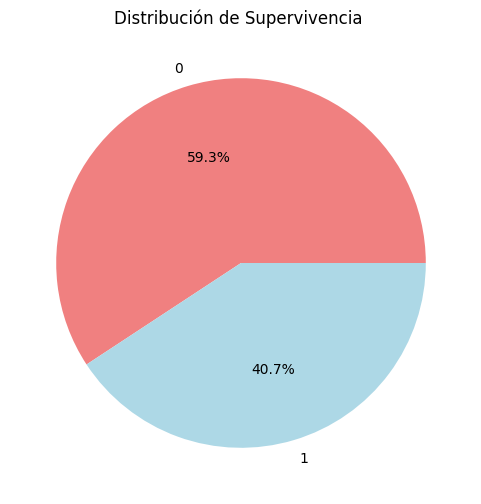

In [ ]:
plt.figure(figsize=(6,6))
df_datoslimpios['survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral','lightblue'])
plt.title('Distribución de Supervivencia ')
plt.ylabel('')
plt.show()

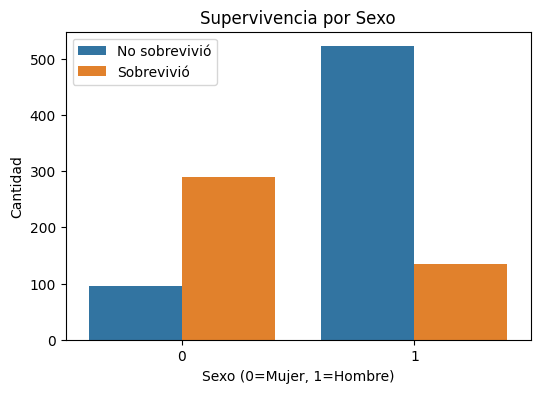

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_datoslimpios, x='sex', hue='survived')
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo (0=Mujer, 1=Hombre)')
plt.ylabel('Cantidad')
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.show()

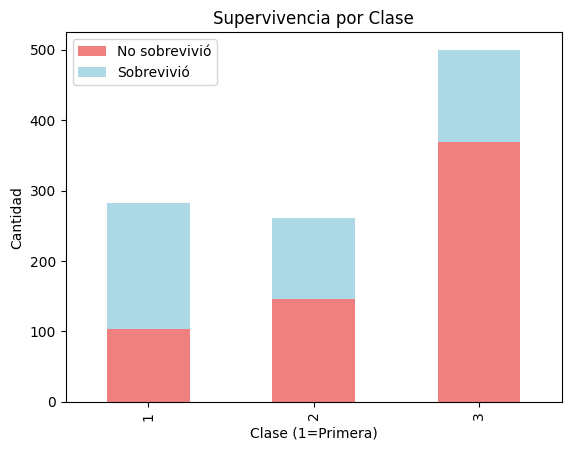

In [ ]:
pd.crosstab(df_datoslimpios['pclass'], df_datoslimpios['survived']).plot(kind='bar', stacked=True, color=['lightcoral','lightblue'])
plt.title('Supervivencia por Clase')
plt.xlabel('Clase (1=Primera)')
plt.ylabel('Cantidad')
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.show()

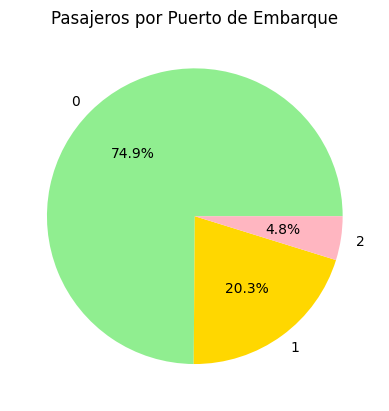

In [ ]:
df_datoslimpios['embarked'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','gold','lightpink'])
plt.title('Pasajeros por Puerto de Embarque')
plt.ylabel('')
plt.show()

<ipython-input-138-152475e1d276>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_datoslimpios, x='pclass', y='survived', ci=None, palette='pastel')
<ipython-input-138-152475e1d276>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_datoslimpios, x='pclass', y='survived', ci=None, palette='pastel')


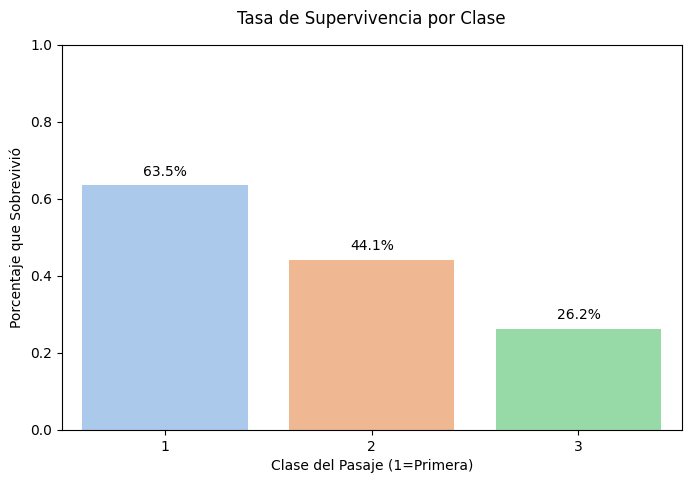

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_datoslimpios, x='pclass', y='survived', ci=None, palette='pastel')


for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Tasa de Supervivencia por Clase', pad=15)
plt.xlabel('Clase del Pasaje (1=Primera)')
plt.ylabel('Porcentaje que Sobrevivió')
plt.ylim(0,1)
plt.show()

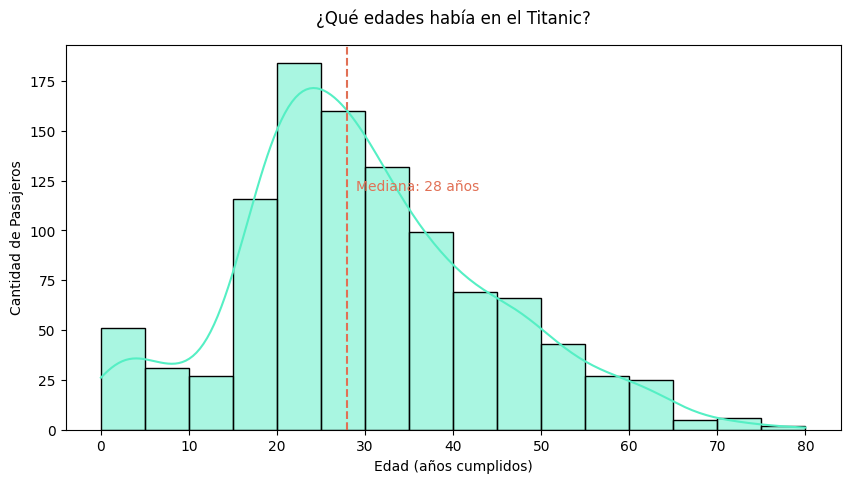

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_datoslimpios['age'].dropna(), bins=range(0,85,5), color='#55efc4', kde=True)
plt.title('¿Qué edades había en el Titanic?', pad=15)
plt.xlabel('Edad (años cumplidos)')
plt.ylabel('Cantidad de Pasajeros')
plt.axvline(df_datoslimpios['age'].median(), color='#e17055', linestyle='--')
plt.text(df_datoslimpios['age'].median()+1, 120, f'Mediana: {df_datoslimpios["age"].median():.0f} años', color='#e17055')
plt.show()

(0.0, 100.0)

<Figure size 800x400 with 0 Axes>

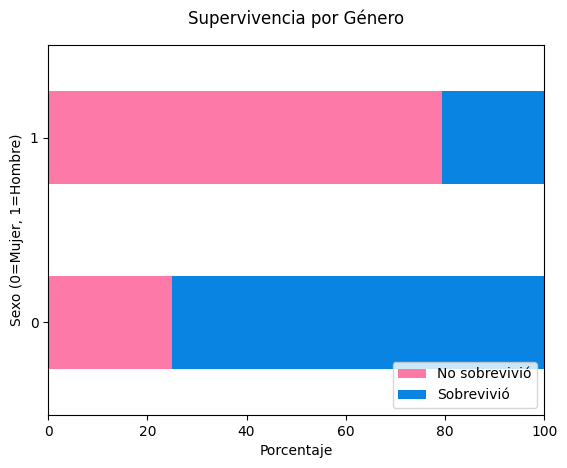

In [ ]:
plt.figure(figsize=(8,4))
Supervivencia_genero = pd.crosstab(df_datoslimpios['sex'], df_datoslimpios['survived'], normalize='index')*100
Supervivencia_genero.plot(kind='barh', stacked=True, color=['#fd79a8','#0984e3'])

plt.title('Supervivencia por Género', pad=15)
plt.xlabel('Porcentaje')
plt.ylabel('Sexo (0=Mujer, 1=Hombre)')
plt.legend(['No sobrevivió', 'Sobrevivió'], loc='lower right')
plt.xlim(0,100)



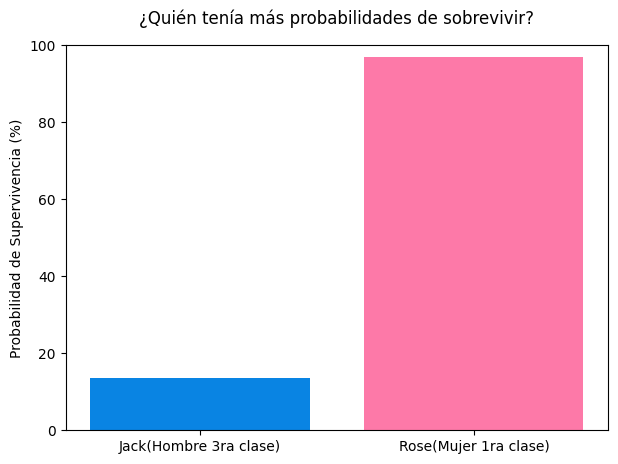

In [ ]:
labels = ['Jack(Hombre 3ra clase)', 'Rose(Mujer 1ra clase)']
survival_chance = [13.5, 97]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, survival_chance, color=['#0984e3','#fd79a8'])
plt.title('¿Quién tenía más probabilidades de sobrevivir?', pad=15)
plt.ylabel('Probabilidad de Supervivencia (%)')
plt.ylim(0,100)
plt.show()

#Conclusiones Generales

*   Supervivencia general: Solo el 38% de pasajeros sobrevivió.
*   Clase social: La 1era clase tuvo mayor supervivencia (63%) vs 3era clase (24%).
*   Género: Mujeres tuvieron 74% de supervivencia vs hombres (1
*   Edad: Los niños menores de 10 años fueron los más salvados. La mediana de edad era 28 años.
*   Jack vs Rose: Jack (hombre en 3ra clase) solo tenía 13.5% de probabilidad vs 97% de Rose (mujer en 1ra clase).
